In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# !python
# Python 3.10.12

In [1]:
# To unzip
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/Emotion_Detection/dataset_big.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
#importing important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D
from keras.layers import BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#taking inputs images for training
picture_size = 48
folder_path = "dataset/"

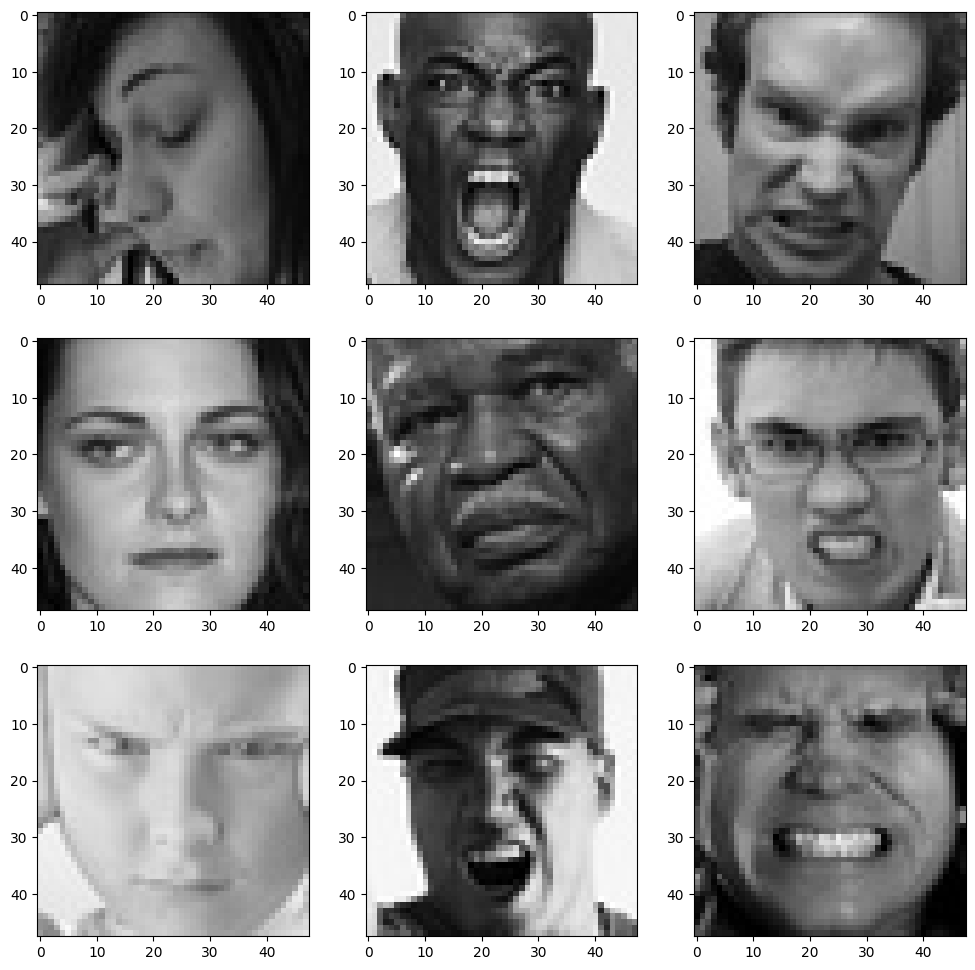

In [5]:
#checking disgust image
expression = '0' #'angry'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

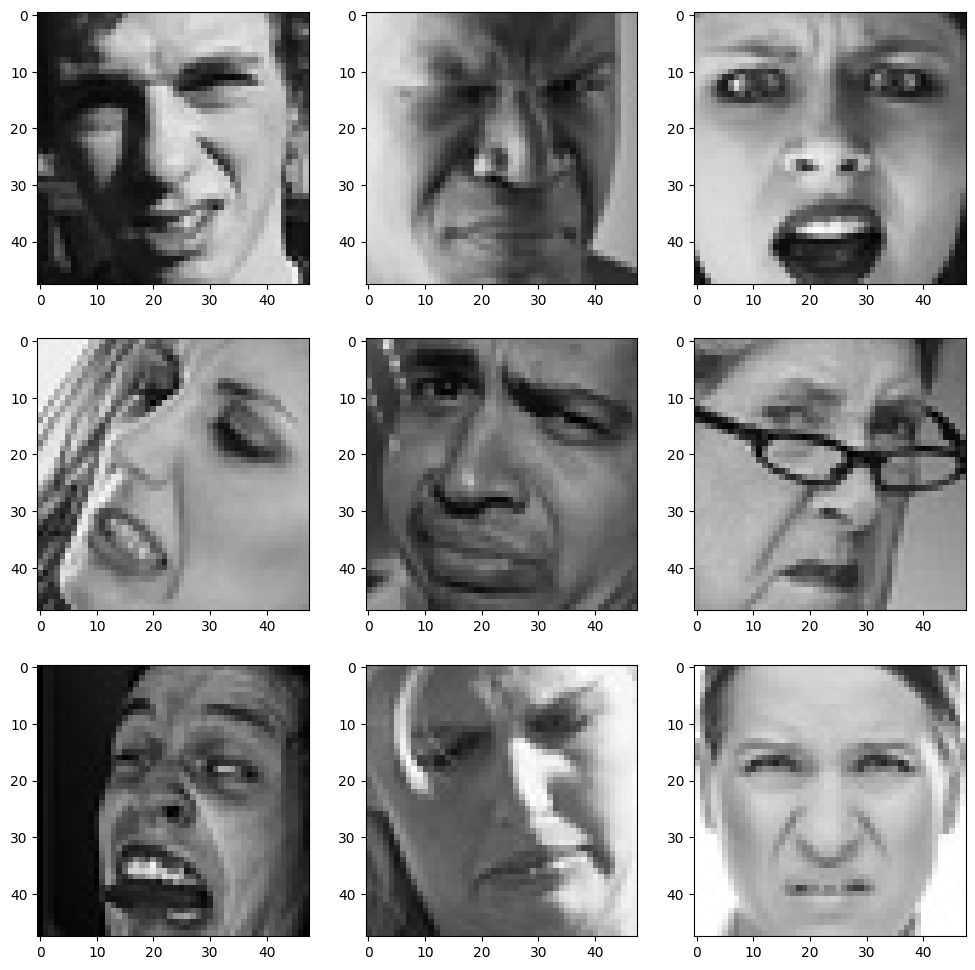

In [6]:
#checking disgust image
expression = '1' # 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

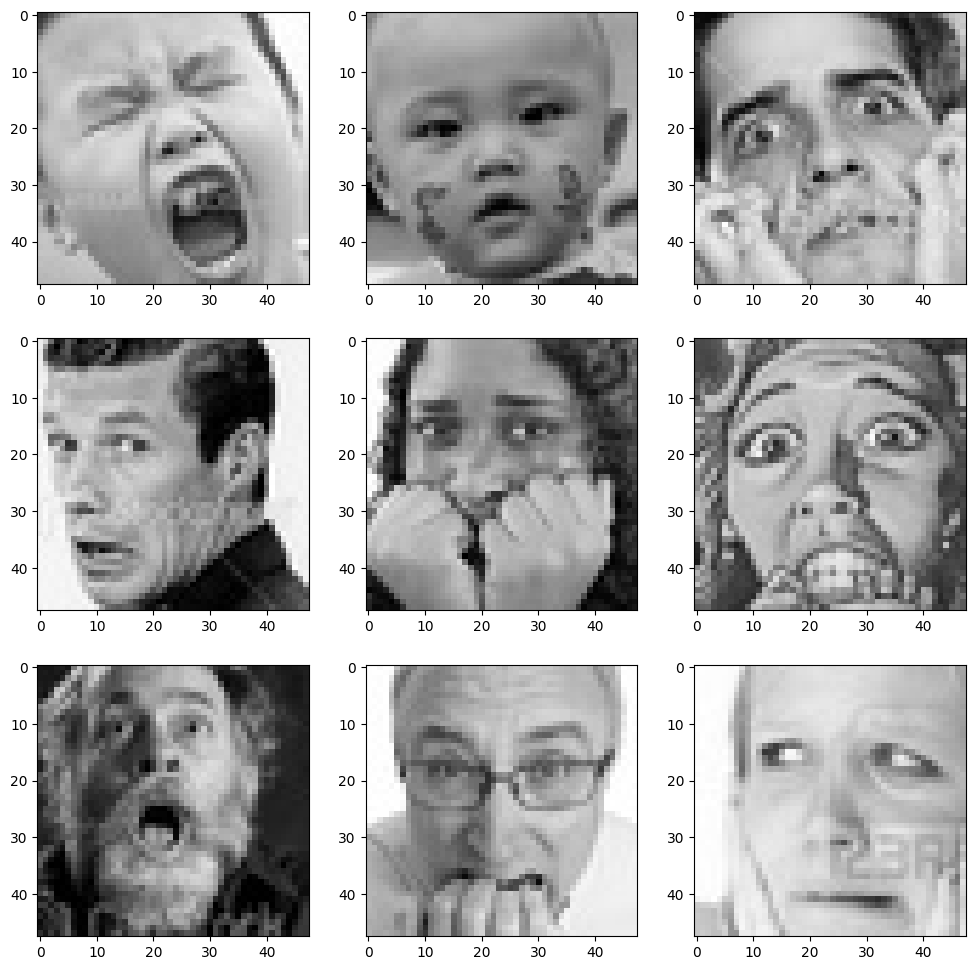

In [7]:
#checking disgust image
expression = '2' # 'fear'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

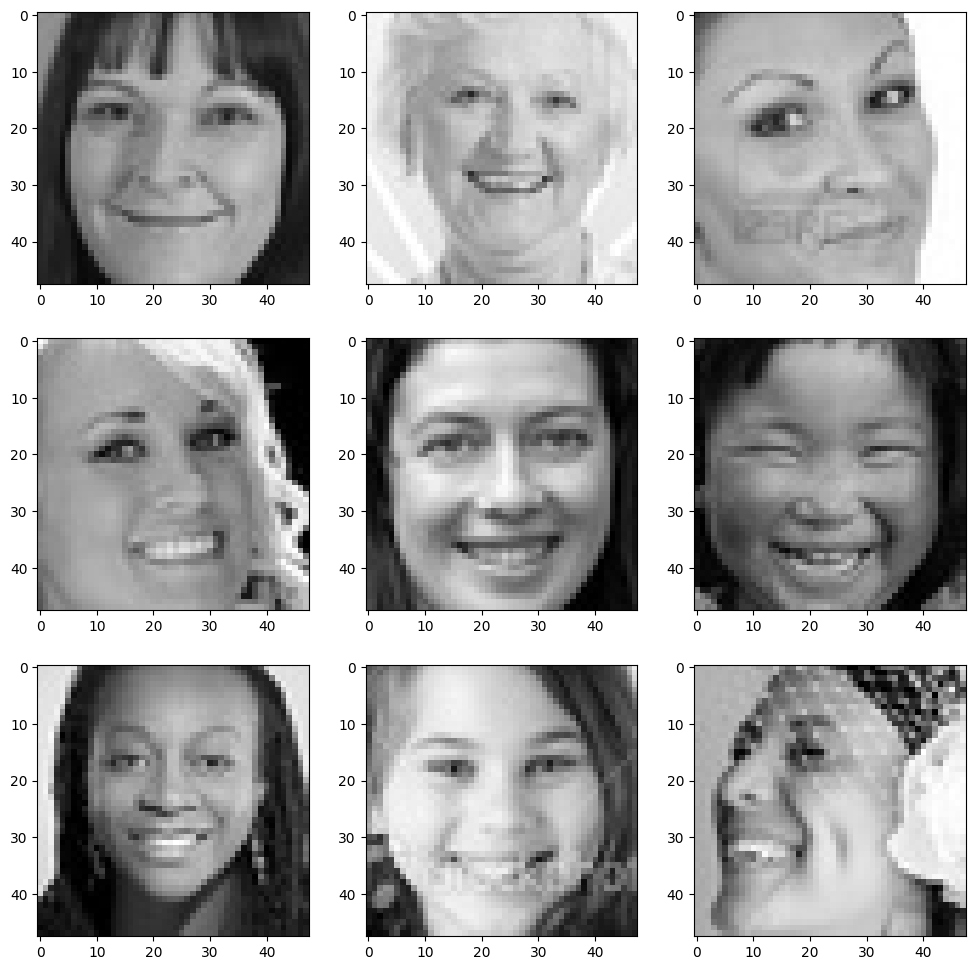

In [8]:
#checking disgust image
expression = '3' # 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

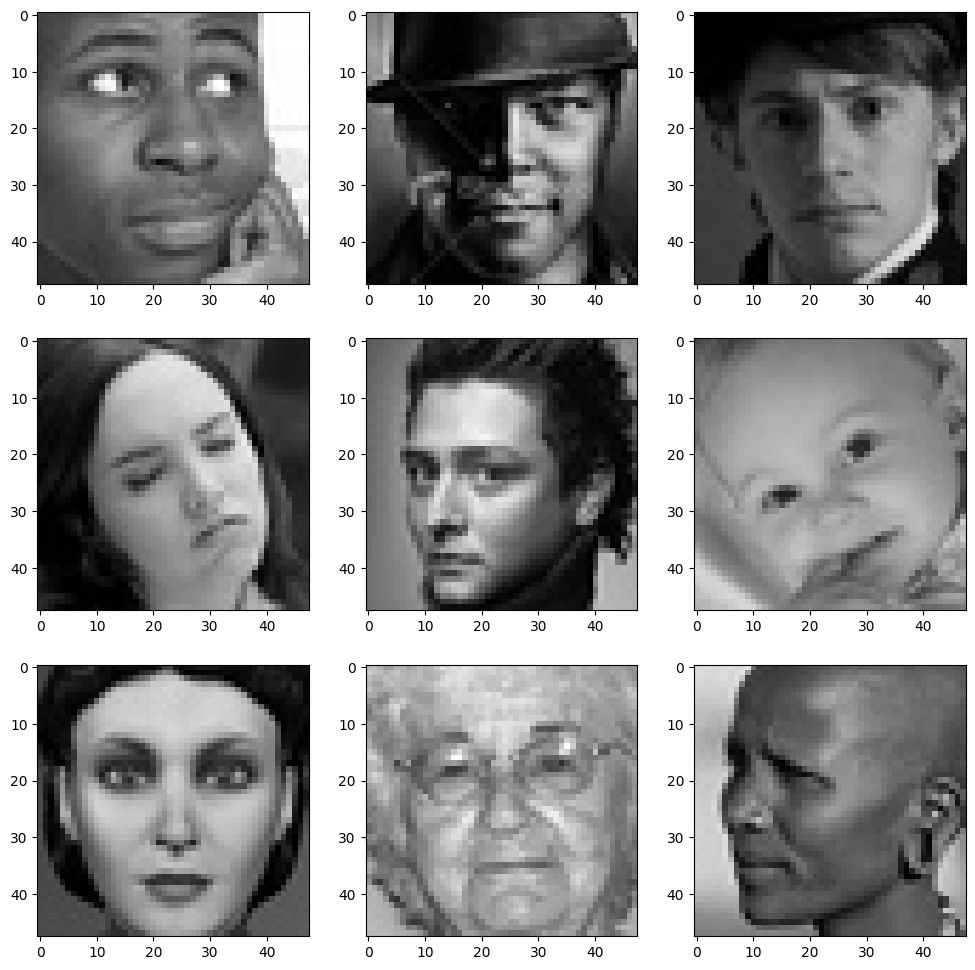

In [9]:
#checking disgust image
expression = '4' # 'neutral'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

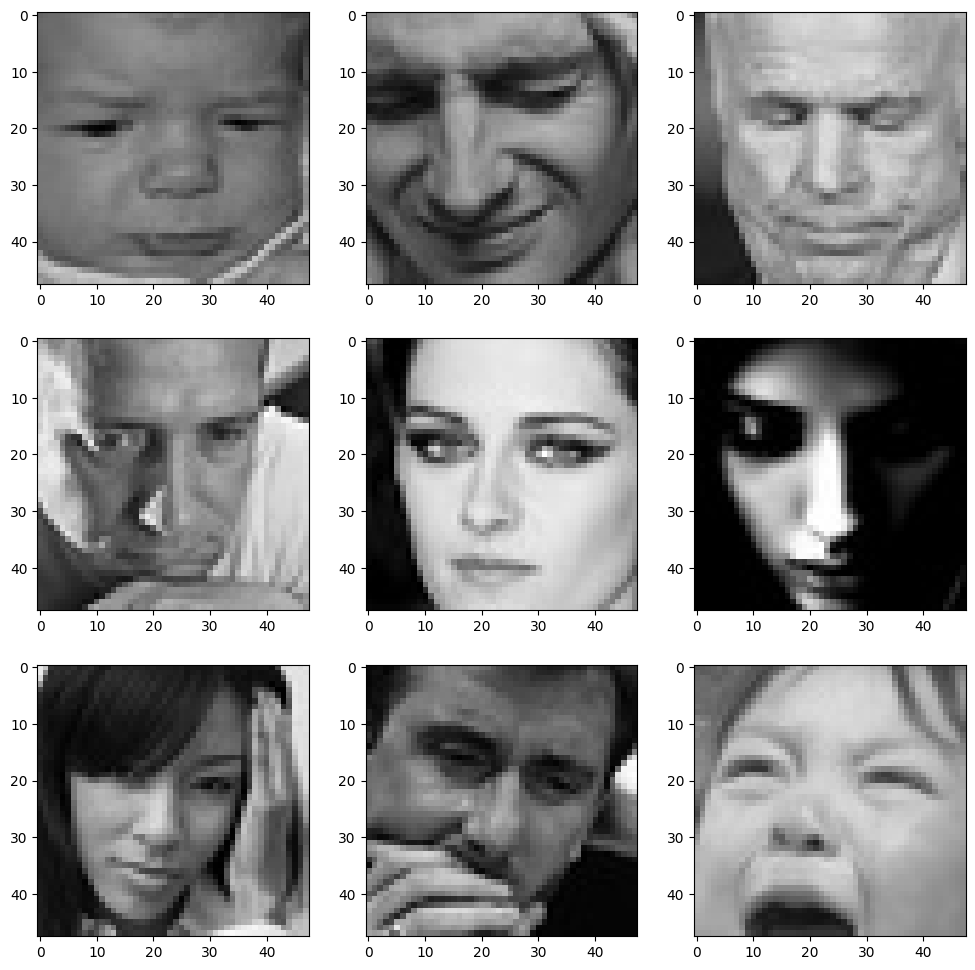

In [10]:
#checking disgust image
expression = '5' # 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

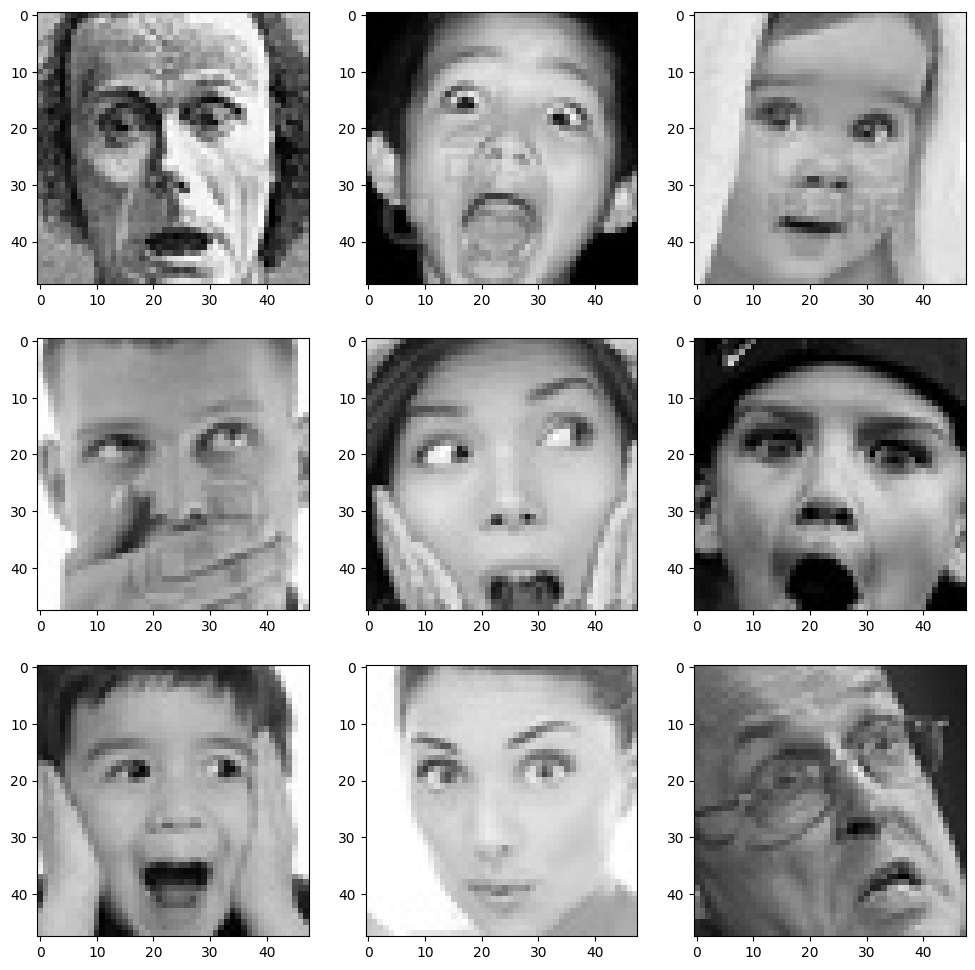

In [11]:
#checking disgust image
expression = '6' # 'surprise'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [12]:
#splitting data into train, test and validation set
batch_size  = 128

datagen_train  = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.1,
                                    zoom_range = 0.05,
                                    horizontal_flip = True,
                                    validation_split=0.2)

datagen_val = ImageDataGenerator(rescale = 1./255)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                           target_size = (picture_size, picture_size),
                                           color_mode = "grayscale",
                                           batch_size = batch_size,
                                           class_mode = 'categorical',
                                           shuffle = False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [13]:
#building model with 7 classes

no_of_classes = 7

# model = Sequential()

# #1st CNN layer
# model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

# #2nd CNN layer
# model.add(Conv2D(128,(5,5),padding = 'same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout (0.25))

# #3rd CNN layer
# model.add(Conv2D(512,(3,3),padding = 'same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout (0.25))

# #4th CNN layer
# model.add(Conv2D(512,(3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# #Fully connected 1st layer
# model.add(Dense(256))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

# # Fully connected layer 2nd layer
# model.add(Dense(512))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

# model.add(Dense(no_of_classes, activation='softmax'))



# model 2

model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (3, 3), input_shape = (48,48,1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(filters = 128, kernel_size = (5, 5), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=no_of_classes, activation='softmax'))

# opt = Adam(lr = 0.0001)
# model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       409728    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

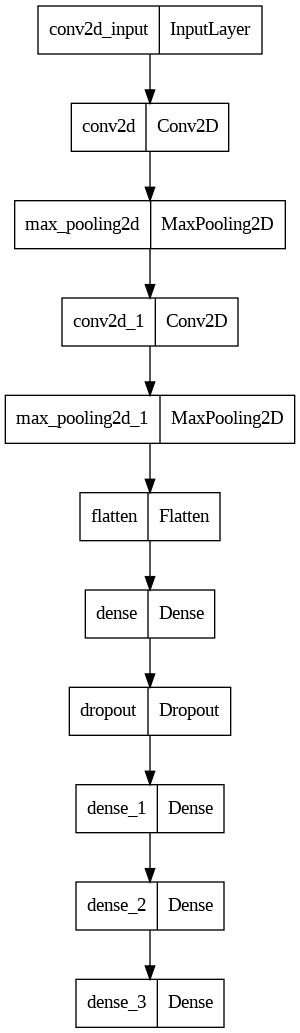

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [15]:

# checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# #Stopping training when a monitored metric has stopped improving.
# # early_stopping = EarlyStopping(monitor='val_loss',
# #                           min_delta=0,
# #                           patience=3,
# #                           verbose=1,
# #                           restore_best_weights=True
# #                           )

# # reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
# #                               factor=0.2,
# #                               patience=3,
# #                               verbose=1,
# #                               min_delta=0.0001)

# callbacks_list = [checkpoint] # ,reduce_learningrate,early_stopping,

# epochs = 50

# model.compile(loss='categorical_crossentropy',
#               optimizer = 'adam',# Adam(lr=0.001),
#               metrics=['accuracy'])


# Checkpoint's
# https://keras.io/api/callbacks/model_checkpoint/

filepath="model_{epoch:02d}_{val_accuracy:.3f}_{val_loss:.3f}.h5"
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks_list = [checkpoint]


In [16]:
#fitting model with 48 epoch
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=100,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/100
225/225 [==============================] - ETA: 0s - loss: 1.8047 - accuracy: 0.2499
Epoch 1: val_loss improved from inf to 1.76578, saving model to model_01_0.280_1.766.h5
225/225 [==============================] - 38s 111ms/step - loss: 1.8047 - accuracy: 0.2499 - val_loss: 1.7658 - val_accuracy: 0.2801
Epoch 2/100
225/225 [==============================] - ETA: 0s - loss: 1.5977 - accuracy: 0.3612
Epoch 2: val_loss improved from 1.76578 to 1.46125, saving model to model_02_0.425_1.461.h5
225/225 [==============================] - 24s 105ms/step - loss: 1.5977 - accuracy: 0.3612 - val_loss: 1.4613 - val_accuracy: 0.4253
Epoch 3/100
225/225 [==============================] - ETA: 0s - loss: 1.4356 - accuracy: 0.4428
Epoch 3: val_loss improved from 1.46125 to 1.40383, saving model to model_03_0.441_1.404.h5
225/225 [==============================] - 22s 99ms/step - loss: 1.4356 - accuracy: 0.4428 - val_loss: 1.4038 - val_accuracy: 0.4415
Epoch 4/100
225/225 [===============

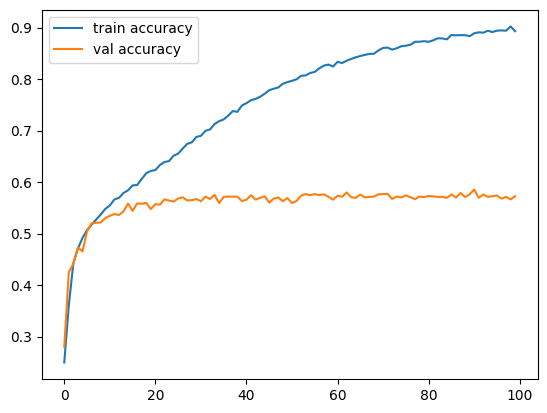

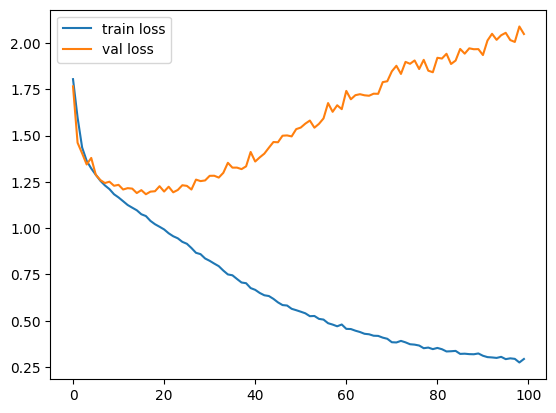

In [17]:
# accuracies
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.savefig('accuracy_and_val_accuracy.png', dpi=200)
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('loss_and_val_loss.png', dpi=200)
plt.show()


In [18]:
from keras.models import load_model
from glob import glob
import os

model = load_model('/content/model_17_0.559_1.183.h5') # /content/model_18_0.636_0.994.h5
model.summary()

data = []
labels = []
classes = glob('dataset/validation/*') # data/train/* # data/test/*
print('Number of classes : ', classes)
cur_path = os.getcwd()
print('cur_path : ', cur_path)


from PIL import Image

# Retrieving the images and their labels
for i in classes: # range(len(classes)):
    # path = os.path.join(cur_path,'images/images/validation',str(i))
    path = os.path.join(str(i))
    print('path : ',path)
    images = os.listdir(path)
    # print('images : ',images)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((48,48))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
print('loaded ...')


y_true = []
y_pred = []

for i in range(len(data)):
    x = data[i]
    x = np.expand_dims(x, axis=0)
    img_data = x # preprocess_input(x)
    classes = model.predict(img_data)
    li = list(classes[0])
    y_pred.append(li.index(max(li)))
    y_true.append(int(labels[i][-1]))

    print('y_true : ', y_true[i], ' y_pred : ', y_pred[i])

print('done...')


Streaming output truncated to the last 5000 lines.
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 24ms/step
y_true :  6  y_pred :  2
1/1 [==============================] - 0s 26ms/step
y_true :  6  y_pred :  2
1/1 [==============================] - 0s 28ms/step
y_true :  6  y_pred :  2
1/1 [==============================] - 0s 26ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 27ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 24ms/step
y_true :  6  y_pred :  2
1/1 [==============================] - 0s 25ms/step
y_true :  6  y_pred :  0
1/1 [==============================] - 0s 20ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 20ms/step
y_true :  6  y_pred :  2
1/1 [==============================] - 0s 19ms/step
y_true :  6  y_pred :  2
1/1 [==============================] - 0s 24ms/step
y_true :  6  y_pred :  2
1/1 [==============================] - 0s 24ms/step
y_true :  6  y_pred :  0


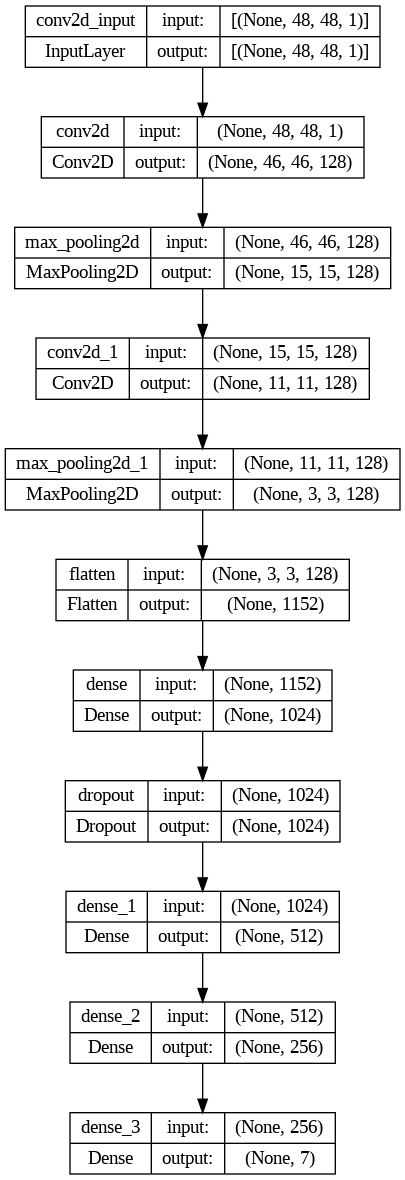

In [19]:
# from keras.utils.vis_utils import plot_model
# https://stackoverflow.com/questions/43511819/importerror-no-module-named-keras-utils-visualize-util
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

[[ 401   14  344   73   36   61   31]
 [  44   10   44    4    2    4    3]
 [ 195    6  566   84   36   45   86]
 [ 200    4  363 1124   27   22   85]
 [ 215   14  370  221  194  105   97]
 [ 255    8  469  133   74  139   61]
 [  54    5  327   45    2    7  357]] 

Accuracy: 0.394990 

Error rate: 0.605010 

classification_report 

               precision    recall  f1-score   support

           0       0.29      0.42      0.35       960
           1       0.16      0.09      0.12       111
           2       0.23      0.56      0.32      1018
           3       0.67      0.62      0.64      1825
           4       0.52      0.16      0.24      1216
           5       0.36      0.12      0.18      1139
           6       0.50      0.45      0.47       797

    accuracy                           0.39      7066
   macro avg       0.39      0.34      0.33      7066
weighted avg       0.45      0.39      0.39      7066
 

Cohens kappa: 0.272992


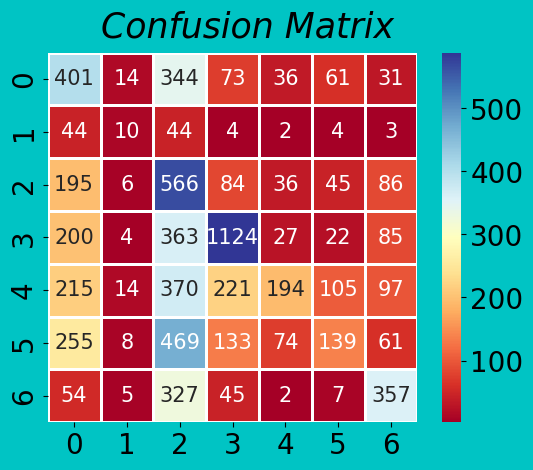

In [20]:
  # confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true,y_pred)
print(matrix, '\n')

# accuracy: (tp + tn) / (p + n)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %f' % accuracy, '\n')
print('Error rate: %f' % (1-accuracy), '\n')

from sklearn.metrics import classification_report
print("classification_report \n\n", classification_report(y_true,y_pred), '\n')

# kappa
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_true,y_pred)
print('Cohens kappa: %f' % kappa)

# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

plt.rcParams['font.size'] = 20
bg_color = (0,0.77,0.77)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color

fig, ax = plt.subplots(1)

plt.text(1,-.3, "Confusion Matrix", fontsize = 25, color='Black', fontstyle='italic')

ax = sns.heatmap(matrix, annot=True, annot_kws={'size':15}, fmt="d",
                 robust=True, linewidths=.9, cmap="RdYlBu", square=True)
# vmin=0, vmax=350,
plt.savefig("model_VGG19.jpeg", dpi=200, facecolor=bg_color, transparent=True)
plt.show()


In [21]:
y_true,y_pred

([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
